In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
fontsize = 16


sns.set_context("paper", rc={
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize,
    "xtick.labelsize": fontsize,
    'ytick.labelsize': fontsize,
    'grid.linewidth': 1.5,
})
sns.set_style("ticks", {"xtick.major.size": 14, "ytick.major.size": 14})

plt.rc('font', family='Times New Roman', weight='bold', size=fontsize)
# plt.rc('lines', lw=3.5)
plt.rcParams.update(
    {'font.size': fontsize, "axes.grid": True, 'grid.linestyle': '-.'})


path_mac = "."
path_linux = "."
PATH = utils.get_data_path(path_mac=path_mac, path_linux=path_linux)

In [2]:
import numpy as np
all_csvs = list(
    map(lambda x: f'{x.split(".csv")[0]}', glob.glob(f"{PATH}/num_container*.csv")))
strategies = ['BaseBatching', "Kraken", "SFS",  "s_Batching"]
legends = ['BaseBatching', "Kraken", "SFS",  "FaaSBatch"]
strategy_csvs = {
    strategy: list(filter(lambda x: strategy in x, all_csvs)) for strategy in strategies
}

data = pd.DataFrame()
for strategy, csvs in strategy_csvs.items():
    for csv in csvs:
        df = pd.read_csv(f"{csv}.csv")
        dispatch_interval = csv.split("_")[-1]
        df['dispatch_interval'] = dispatch_interval
        if strategy == 's_Batching':
            df['strategy'] = "FaaSBatch"
        else:
            df['strategy'] = strategy
        data = pd.concat([df, data])


In [3]:
data

,strategy,dispatch_interval,num_containers
0,FaaSBatch,0.5,12
0,FaaSBatch,0.1,18
0,FaaSBatch,0.3,13
0,FaaSBatch,0.4,10
0,FaaSBatch,0.01,26
0,FaaSBatch,0.2,16
0,FaaSBatch,0.15,18
0,FaaSBatch,0.05,19
0,SFS,0.01,186
0,SFS,0.15,278


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


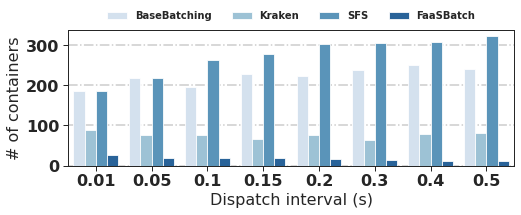

In [4]:
def bar_plot(y, y_label):
    fig, ax1 = plt.subplots(figsize=(8, 2.5))
    sns.barplot(x="dispatch_interval", y=y, hue="strategy", hue_order=legends,
                data=data, palette="Blues", order=sorted(data['dispatch_interval'].unique()))
    data['strategy'].unique()
    sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1),
                    ncol=4, title=None, frameon=False, fontsize=fontsize-6)
    ax1.set_ylabel(y_label)
    ax1.set_xlabel("Dispatch interval (s)")
    fig.show()

bar_plot(y="num_containers", y_label="# of containers")